In [1]:
'''

application of calculate ocean heat budget III

one area all time series

'''

'\n\napplication of calculate ocean heat budget III\n\none area all time series\n\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
from scipy.interpolate import interp2d, NearestNDInterpolator

import os
os.getcwd()

%cd /g/data/p66/ars599/EAE_Lecture

/g/data/p66/ars599/EAE_Lecture


# 1) load the advection netCDF files

<xarray.Dataset>
Dimensions:                (time: 120, lon: 192, lat: 144)
Coordinates:
  * time                   (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009...
  * lon                    (lon) float64 0.9375 2.812 4.688 ... 357.2 359.1
  * lat                    (lat) float64 -89.38 -88.12 -86.88 ... 88.12 89.38
Data variables:
    net_surface_heat_flux  (time, lat, lon) float32 ...
[120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5
 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5 155.5
 156.5 157.5 158.5 159.5 160.5 161.5 162.5 163.5 164.5 165.5 166.5 167.5
 168.5 169.5 170.5 171.5 172.5 173.5 174.5 175.5 176.5 177.5 178.5 179.5
 180.5 181.5 182.5 183.5 184.5 185.5 186.5 187.5 188.5 189.5 190.5 191.5
 192.5 193.5 194.5 195.5 196.5 197.5 198.5 199.5 200.5 201.5 202.5 203.5
 204.5 205.5 206.5 207.5 208.5 209.5 210.5 211.5 212.5 213.5 214.5 215.5
 216.5 217.5 218.5 2

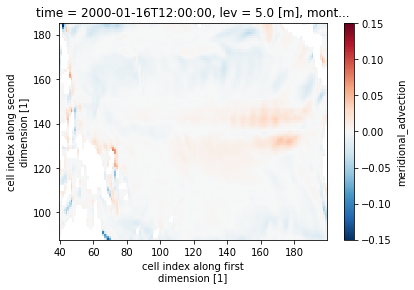

In [12]:
idir = '/g/data/p66/ars599/EAE_Lecture/'
#filenames = [idir+'zonal_advection_and_terms.nc',
#            idir+'meridional_advection_and_terms.nc',
#            idir+'vertical_advection_and_terms.nc',
#            idir+'net_surface_heat_flux.nc',
#            idir+'temperature_tendency.nc']
filenames = [idir+'temperature_tendency.nc',
             idir+'net_surface_heat_flux.nc']
file_list = []

for filename in filenames:
    ds = xr.open_dataset(filename)
    file_list.append(ds)

#zonal_ds      = file_list[0]
#meridional_ds = file_list[0]
#vertical_ds   = file_list[0]
nethflx_ds    = file_list[1]
tempdency_ds  = file_list[0]

tempdency_ds.meridional_advection[0,0].plot()

print(nethflx_ds)
print(tempdency_ds.longitude[0,:].values)
print(tempdency_ds.latitude[:,0].values)
print(tempdency_ds.lev.values)

In [6]:
lev_range = (45, 45) # (0, 10)
lon_range = (190.5, 190.5) # (190, 240) # (180, 240) # (190, 240)
lat_range = (-0.2,   -0.16620922) # (-5, 5) # (-15, 15) # (-5, 5)

lon_indices = np.where((tempdency_ds.longitude[0,:] >= lon_range[0]) & (tempdency_ds.longitude[0,:] <= lon_range[1]))[0]
print(lon_indices)
lat_indices = np.where((tempdency_ds.latitude[:,0] >= lat_range[0]) & (tempdency_ds.latitude[:,0] <= lat_range[1]))[0]
print(lat_indices)
lev_indices = np.where((tempdency_ds.lev >= lev_range[0]) & (tempdency_ds.lev <= lev_range[1]))[0]
print(lev_indices)

zonal_df = tempdency_ds.isel(lev=lev_indices, j=lat_indices, i=lon_indices)
meridional_df = tempdency_ds.isel(lev=lev_indices, j=lat_indices, i=lon_indices)
vertical_df = tempdency_ds.isel(lev=lev_indices, j=lat_indices, i=lon_indices)
tempdency_df = tempdency_ds.isel(lev=lev_indices, j=lat_indices, i=lon_indices)

# single point
zonal_df_ts      = np.squeeze( zonal_df)#.mean(['i','j']) )
meridional_df_ts = np.squeeze( meridional_df)#.mean(['i','j']) )
vertical_df_ts   = np.squeeze( vertical_df)#.mean(['i','j']) )
tempdency_df_ts   = np.squeeze( tempdency_df)#.mean(['i','j']) )

# Convert the units
# Given temperature gradient in °C/° on the latitude longitude in degrees
dT_dx_deg_per_deg = 1  # Example temperature gradient in °C/°
# Earth's radius in meters
earth_radius = 6.371e6  # Earth's radius in meters
# Calculate meridional distance at the given latitude
grid_spacing = earth_radius * np.radians(1.0)

# Convert temperature gradient to °C/m
# UdTdx_deg_per_m = UdTdx_deg_per_deg * (1 / grid_spacing)
zonal_df_ts_meters = np.squeeze( zonal_df * (1/grid_spacing) )
meridonal_df_ts_meters = np.squeeze( meridional_df * (1/grid_spacing) )
vert_df_ts_meters = np.squeeze( vertical_df * (1/grid_spacing) )

# Convert temperature tendency from °C/month to °C/sec
tempdency_df = np.squeeze( tempdency_df * 86400 * 30 )

# test the values
zonal_df_ts_meters.values

[70]
[48]
[4]


<bound method Mapping.values of <xarray.Dataset>
Dimensions:               (time: 120)
Coordinates:
  * time                  (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-...
    longitude             float64 ...
    latitude              float64 ...
    i                     float64 110.0
    j                     float64 136.0
    lev                   float64 45.0
    month                 (time) int64 ...
Data variables: (12/16)
    dT_dt                 (time) float32 -8.172e-21 -5.107e-21 ... -1.404e-21
    zonal_advection       (time) float32 2.904e-07 3.604e-07 ... 7.291e-08
    TbUb                  (time) float32 3.267e-07 3.765e-07 ... 1.72e-07
    TaUb                  (time) float32 -5.299e-09 -2.315e-08 ... -1.27e-07
    TbUa                  (time) float32 -3.153e-08 7.567e-09 ... 1.065e-07
    TaUa                  (time) float32 5.115e-10 -4.654e-10 ... -7.866e-08
    ...                    ...
    TaVa                  (time) float32 -3.993e-10 -3.493e-08 ... -5

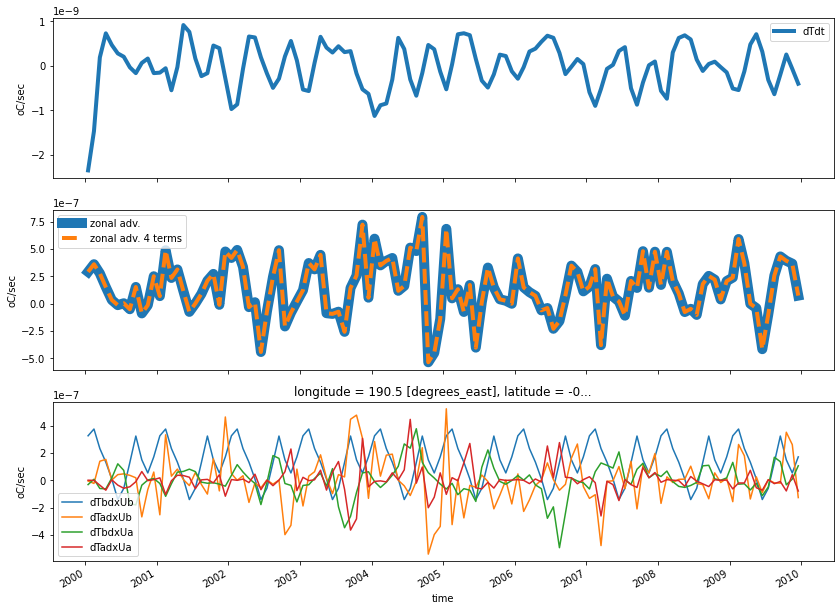

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True)
plt.subplot(311)
#zonal_df_ts.dT_dt.plot(label='dTdt')
plt.plot(tempdency_df.time, tempdency_df.dT_dt,label='dTdt',linewidth=4)
plt.ylabel('oC/sec')
plt.legend()

plt.subplot(312)
zonal_4terms = zonal_df_ts_meters.TbUb + zonal_df_ts_meters.TaUb + zonal_df_ts_meters.TbUa + zonal_df_ts_meters.TaUa
plt.plot(zonal_df_ts_meters.time, zonal_df_ts_meters.zonal_advection, label='zonal adv.', linewidth=10)
plt.plot(zonal_4terms.time, zonal_4terms, label='zonal adv. 4 terms', linestyle='--',linewidth=4)
plt.ylabel('oC/sec')
plt.legend()

plt.subplot(313)
zonal_df_ts_meters.TbUb.plot(label='dTbdxUb')
zonal_df_ts_meters.TaUb.plot(label='dTadxUb')
zonal_df_ts_meters.TbUa.plot(label='dTbdxUa')
zonal_df_ts_meters.TaUa.plot(label='dTadxUa')
plt.ylabel('oC/sec')
plt.legend()

output_filename = f"zonal_adv_{lev_range[0]}-{lev_range[1]}.png"
plt.savefig(output_filename, dpi=300)


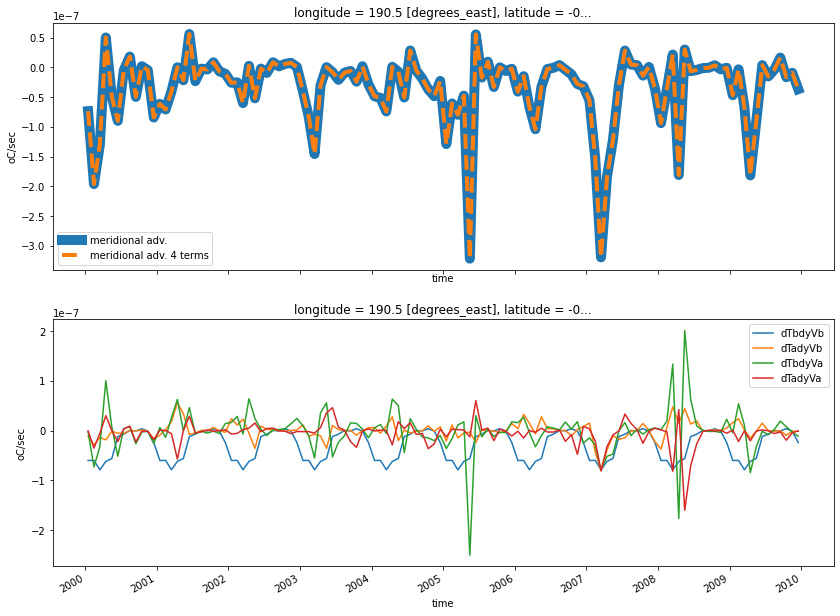

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

plt.subplot(211)
meridional_4terms = meridonal_df_ts_meters.TbVb + meridonal_df_ts_meters.TaVb + meridonal_df_ts_meters.TbVa + meridonal_df_ts_meters.TaVa
meridonal_df_ts_meters.meridional_advection.plot(label='meridional adv.', linewidth=10)
meridional_4terms.plot(label='meridional adv. 4 terms', linestyle='--',linewidth=4)
plt.ylabel('oC/sec')
plt.legend()

plt.subplot(212)
meridonal_df_ts_meters.TbVb.plot(label='dTbdyVb')
meridonal_df_ts_meters.TaVb.plot(label='dTadyVb')
meridonal_df_ts_meters.TbVa.plot(label='dTbdyVa')
meridonal_df_ts_meters.TaVa.plot(label='dTadyVa')
plt.ylabel('oC/sec')
plt.legend()

output_filename = f"meridional_adv_{lev_range[0]}-{lev_range[1]}.png"
plt.savefig(output_filename, dpi=300)

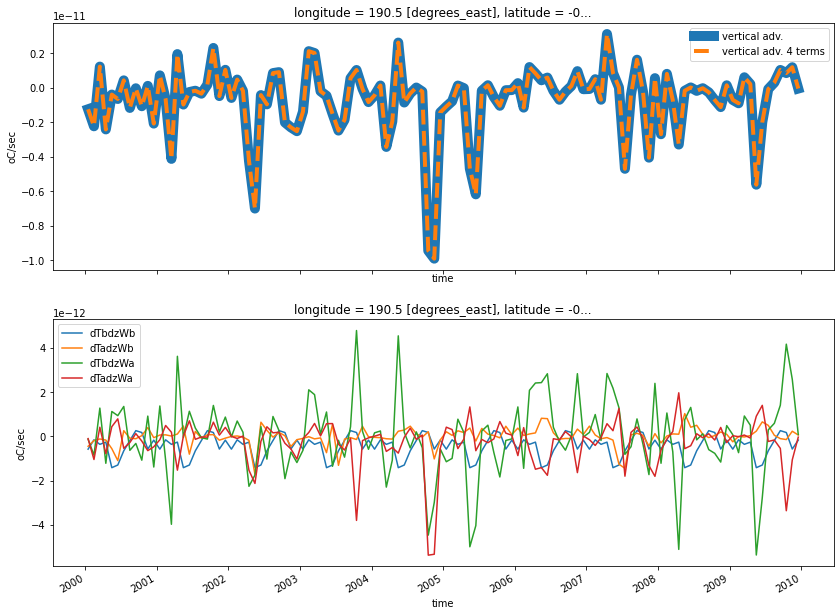

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

plt.subplot(211)
vertical_4terms = vert_df_ts_meters.TbWb + vert_df_ts_meters.TaWb + vert_df_ts_meters.TbWa + vert_df_ts_meters.TaWa
vert_df_ts_meters.vertical_advection.plot(label='vertical adv.',linewidth=10)
vertical_4terms.plot(label='vertical adv. 4 terms', linestyle='--',linewidth=4)
plt.ylabel('oC/sec')
plt.legend()

plt.subplot(212)
vert_df_ts_meters.TbWb.plot(label='dTbdzWb')
vert_df_ts_meters.TaWb.plot(label='dTadzWb')
vert_df_ts_meters.TbWa.plot(label='dTbdzWa')
vert_df_ts_meters.TaWa.plot(label='dTadzWa')
plt.ylabel('oC/sec')
plt.legend()

output_filename = f"vertical_adv_{lev_range[0]}-{lev_range[1]}.png"
plt.savefig(output_filename, dpi=300)

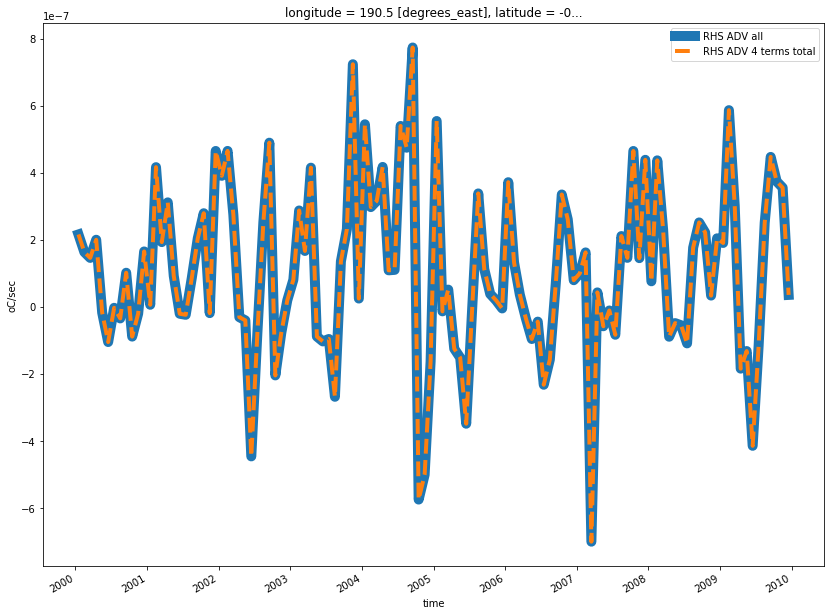

In [43]:
fig, axs = plt.subplots(figsize=(14, 10), sharex=True)

ADV = zonal_df_ts_meters.zonal_advection + meridonal_df_ts_meters.meridional_advection + vert_df_ts_meters.vertical_advection
ADV_4terms = zonal_4terms + meridional_4terms + vertical_4terms
ADV.plot(label='RHS ADV all',linewidth=10)
RHS_4terms.plot(label='RHS ADV 4 terms total', linestyle='--',linewidth=4)
plt.ylabel('oC/sec')
plt.legend()

output_filename = f"total_adv_{lev_range[0]}-{lev_range[1]}.png"
plt.savefig(output_filename, dpi=300)

# ========== testing ===========

(189.0, 191.0)
(-1.0, 0.0)
<xarray.Dataset>
Dimensions:                (time: 120, lon: 192, lat: 144)
Coordinates:
  * time                   (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009...
  * lon                    (lon) float64 0.9375 2.812 4.688 ... 357.2 359.1
  * lat                    (lat) float64 -89.38 -88.12 -86.88 ... 88.12 89.38
Data variables:
    net_surface_heat_flux  (time, lat, lon) float32 ...
[101]
[71]


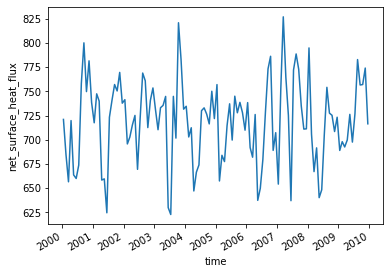

In [23]:
lon_range = (189., 191.) # (190, 240) # (180, 240) # (190, 240)
lat_range = (-1.,   0.) # (-5, 5) # (-15, 15) # (-5, 5)
print(lon_range)
print(lat_range)
print(nethflx_ds)

lon_indices = np.where((nethflx_ds.lon >= lon_range[0]) & (nethflx_ds.lon <= lon_range[1]))[0]
print(lon_indices)
lat_indices = np.where((nethflx_ds.lat >= lat_range[0]) & (nethflx_ds.lat <= lat_range[1]))[0]
print(lat_indices)


nethflx_df = nethflx_ds.isel(lat=lat_indices, lon=lon_indices)
nethflx_ds_ts = np.squeeze( nethflx_df.mean(['lon','lat']) )

Cp = 1005  # Specific heat capacity of air in J/(kg*K)
density_air = 1.2  # Air density in kg/m³
thickness = 1000  # Atmospheric layer thickness in meters
time_interval_seconds = 30 * 24 * 60 * 60  # 30 days in seconds

nFlx = nethflx_ds_ts.net_surface_heat_flux
nFlx_degC_per_second = (nFlx * time_interval_seconds) / (Cp * density_air * thickness)

nFlx_degC_per_second.plot()


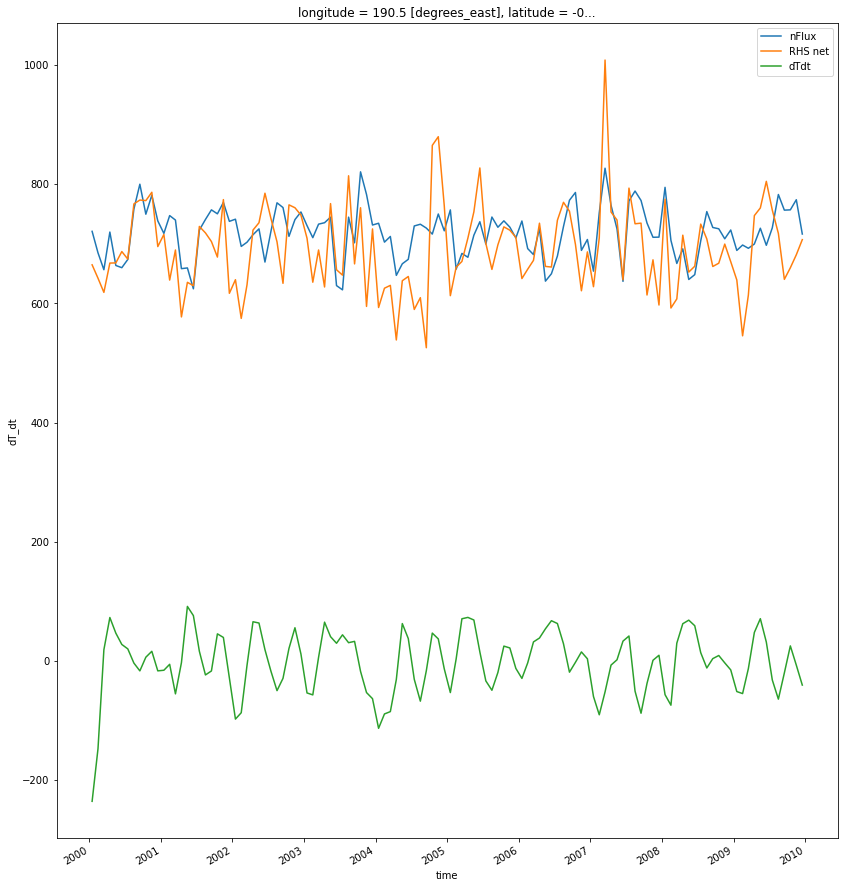

In [52]:
'''
testing only

'''
dT_dt = tempdency_df.dT_dt * 1e11
ADV_all = ADV * 86400 * 30 * 100
nFlx_all = nFlx_degC_per_second
RHS_net = nFlx_all - ADV_all

fig = plt.subplots(figsize=(14, 15))
nFlx_all.plot(label='nFlux')
RHS_net.plot(label='RHS net')
dT_dt.plot(label='dTdt')
plt.legend()
